In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("TITANI REAL ONE.csv")
df

,True,Survived,Pclass,Age,SibSp,Parch,Sex_le,Embarked_le,min_max_Fair
0,0,0,3,22.0,1,0,1,2,0.014
1,1,1,1,38.0,1,0,0,0,0.139
2,2,1,3,26.0,0,0,0,2,0.015
3,3,1,1,35.0,1,0,0,2,0.104
4,4,0,3,35.0,0,0,1,2,0.016
...,...,...,...,...,...,...,...,...,...
886,886,0,2,27.0,0,0,1,2,0.025
887,887,1,1,19.0,0,0,0,2,0.059
888,888,0,3,29.7,1,2,0,2,0.046
889,889,1,1,26.0,0,0,1,0,0.059


In [3]:
df.shape

(891, 9)

In [4]:
df.drop(columns = ['True'],inplace = True)

In [5]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_le,Embarked_le,min_max_Fair
0,0,3,22.0,1,0,1,2,0.014
1,1,1,38.0,1,0,0,0,0.139
2,1,3,26.0,0,0,0,2,0.015
3,1,1,35.0,1,0,0,2,0.104
4,0,3,35.0,0,0,1,2,0.016


In [6]:
X = df.drop(columns="Survived",axis = 1)
y = df["Survived"]

In [59]:
X

,Pclass,Age,SibSp,Parch,Sex_le,Embarked_le,min_max_Fair
0,3,22.0,1,0,1,2,0.014
1,1,38.0,1,0,0,0,0.139
2,3,26.0,0,0,0,2,0.015
3,1,35.0,1,0,0,2,0.104
4,3,35.0,0,0,1,2,0.016
...,...,...,...,...,...,...,...
886,2,27.0,0,0,1,2,0.025
887,1,19.0,0,0,0,2,0.059
888,3,29.7,1,2,0,2,0.046
889,1,26.0,0,0,1,0,0.059


In [ ]:
# Example: Assume your data is already split and loaded into these variables
X_train, X_test, y_train, y_test = # Load your pre-split data here

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [61]:
# modelling
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X,y)

# predication
ypred_train = log_model.predict(X)
print("train accuracy:",accuracy_score(y,ypred_train))


# cross validation score
from sklearn.model_selection import cross_val_score
print("cv score :",cross_val_score(log_model,X,y,cv =5,scoring ="accuracy").mean())




train accuracy: 0.8069584736251403
cv score : 0.794620551126734


In [62]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y,ypred_train))

from sklearn.metrics import classification_report
print(classification_report(y,ypred_train))

confusion_matrix: [[474  75]
 [ 97 245]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       549
           1       0.77      0.72      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


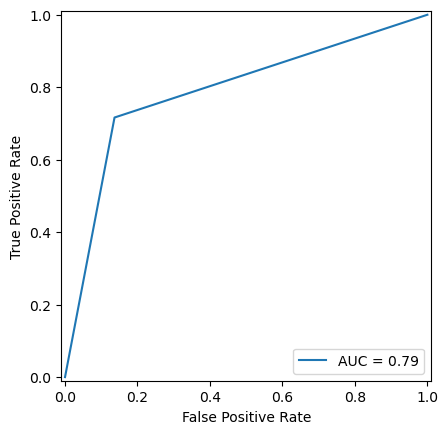

In [64]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr,tpr,thresholds = roc_curve(y,ypred_train)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc = roc_auc).plot()
plt.show()

# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
from sklearn.model_selection import GridSearchCV
# hyper parameter tuning
estimator = KNeighborsClassifier()
param_grid = {"n_neighbors":list(range(1,50)),"p":[1,2]}
knn_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
knn_grid.fit(X,y)

# kNN with the best estimator
knn_grid.best_estimator_

KNeighborsClassifier(p=1)

In [67]:
# modelling 
knn_model = knn_grid.best_estimator_
knn_model.fit(X,y)

# pred & evaluation on train data set
ypred_train = knn_model.predict(X)
print("Train Accuracy:",accuracy_score(y,ypred_train))

# cross validation on train data 
print("CV score:",cross_val_score(knn_model,X,ypred_train).mean())
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y,ypred_train))


Train Accuracy: 0.8597081930415263
CV score: 0.9090829200929006
confusion_matrix: [[502  47]
 [ 78 264]]


# svm

In [68]:
from sklearn.svm import SVC
estimator = SVC()
param_grid = {"C":[0.01,0.1,1],"kernel":["linear","rbf","sigmoid","poly"]}
svm_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
svm_grid.fit(X,y)

# svm wi

svm_grid.best_estimator_

SVC(C=0.01, kernel='linear')

In [69]:
svm_model = svm_grid.best_estimator_
svm_model.fit(X,y)
 #predict and evaluation on train data
ypred_train = svm_model.predict(X)
print("train CV:",cross_val_score(svm_model,X,ypred_train,cv=5,scoring="accuracy").mean())
print("trainaccuracy:",accuracy_score(y,ypred_train))


train CV: 0.9416609126859582
trainaccuracy: 0.8114478114478114


In [70]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y,ypred_train))


confusion_matrix: [[493  56]
 [112 230]]


# decession tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



In [72]:
model = DecisionTreeClassifier(random_state=True)
model.fit(X,y)

DecisionTreeClassifier(random_state=True)

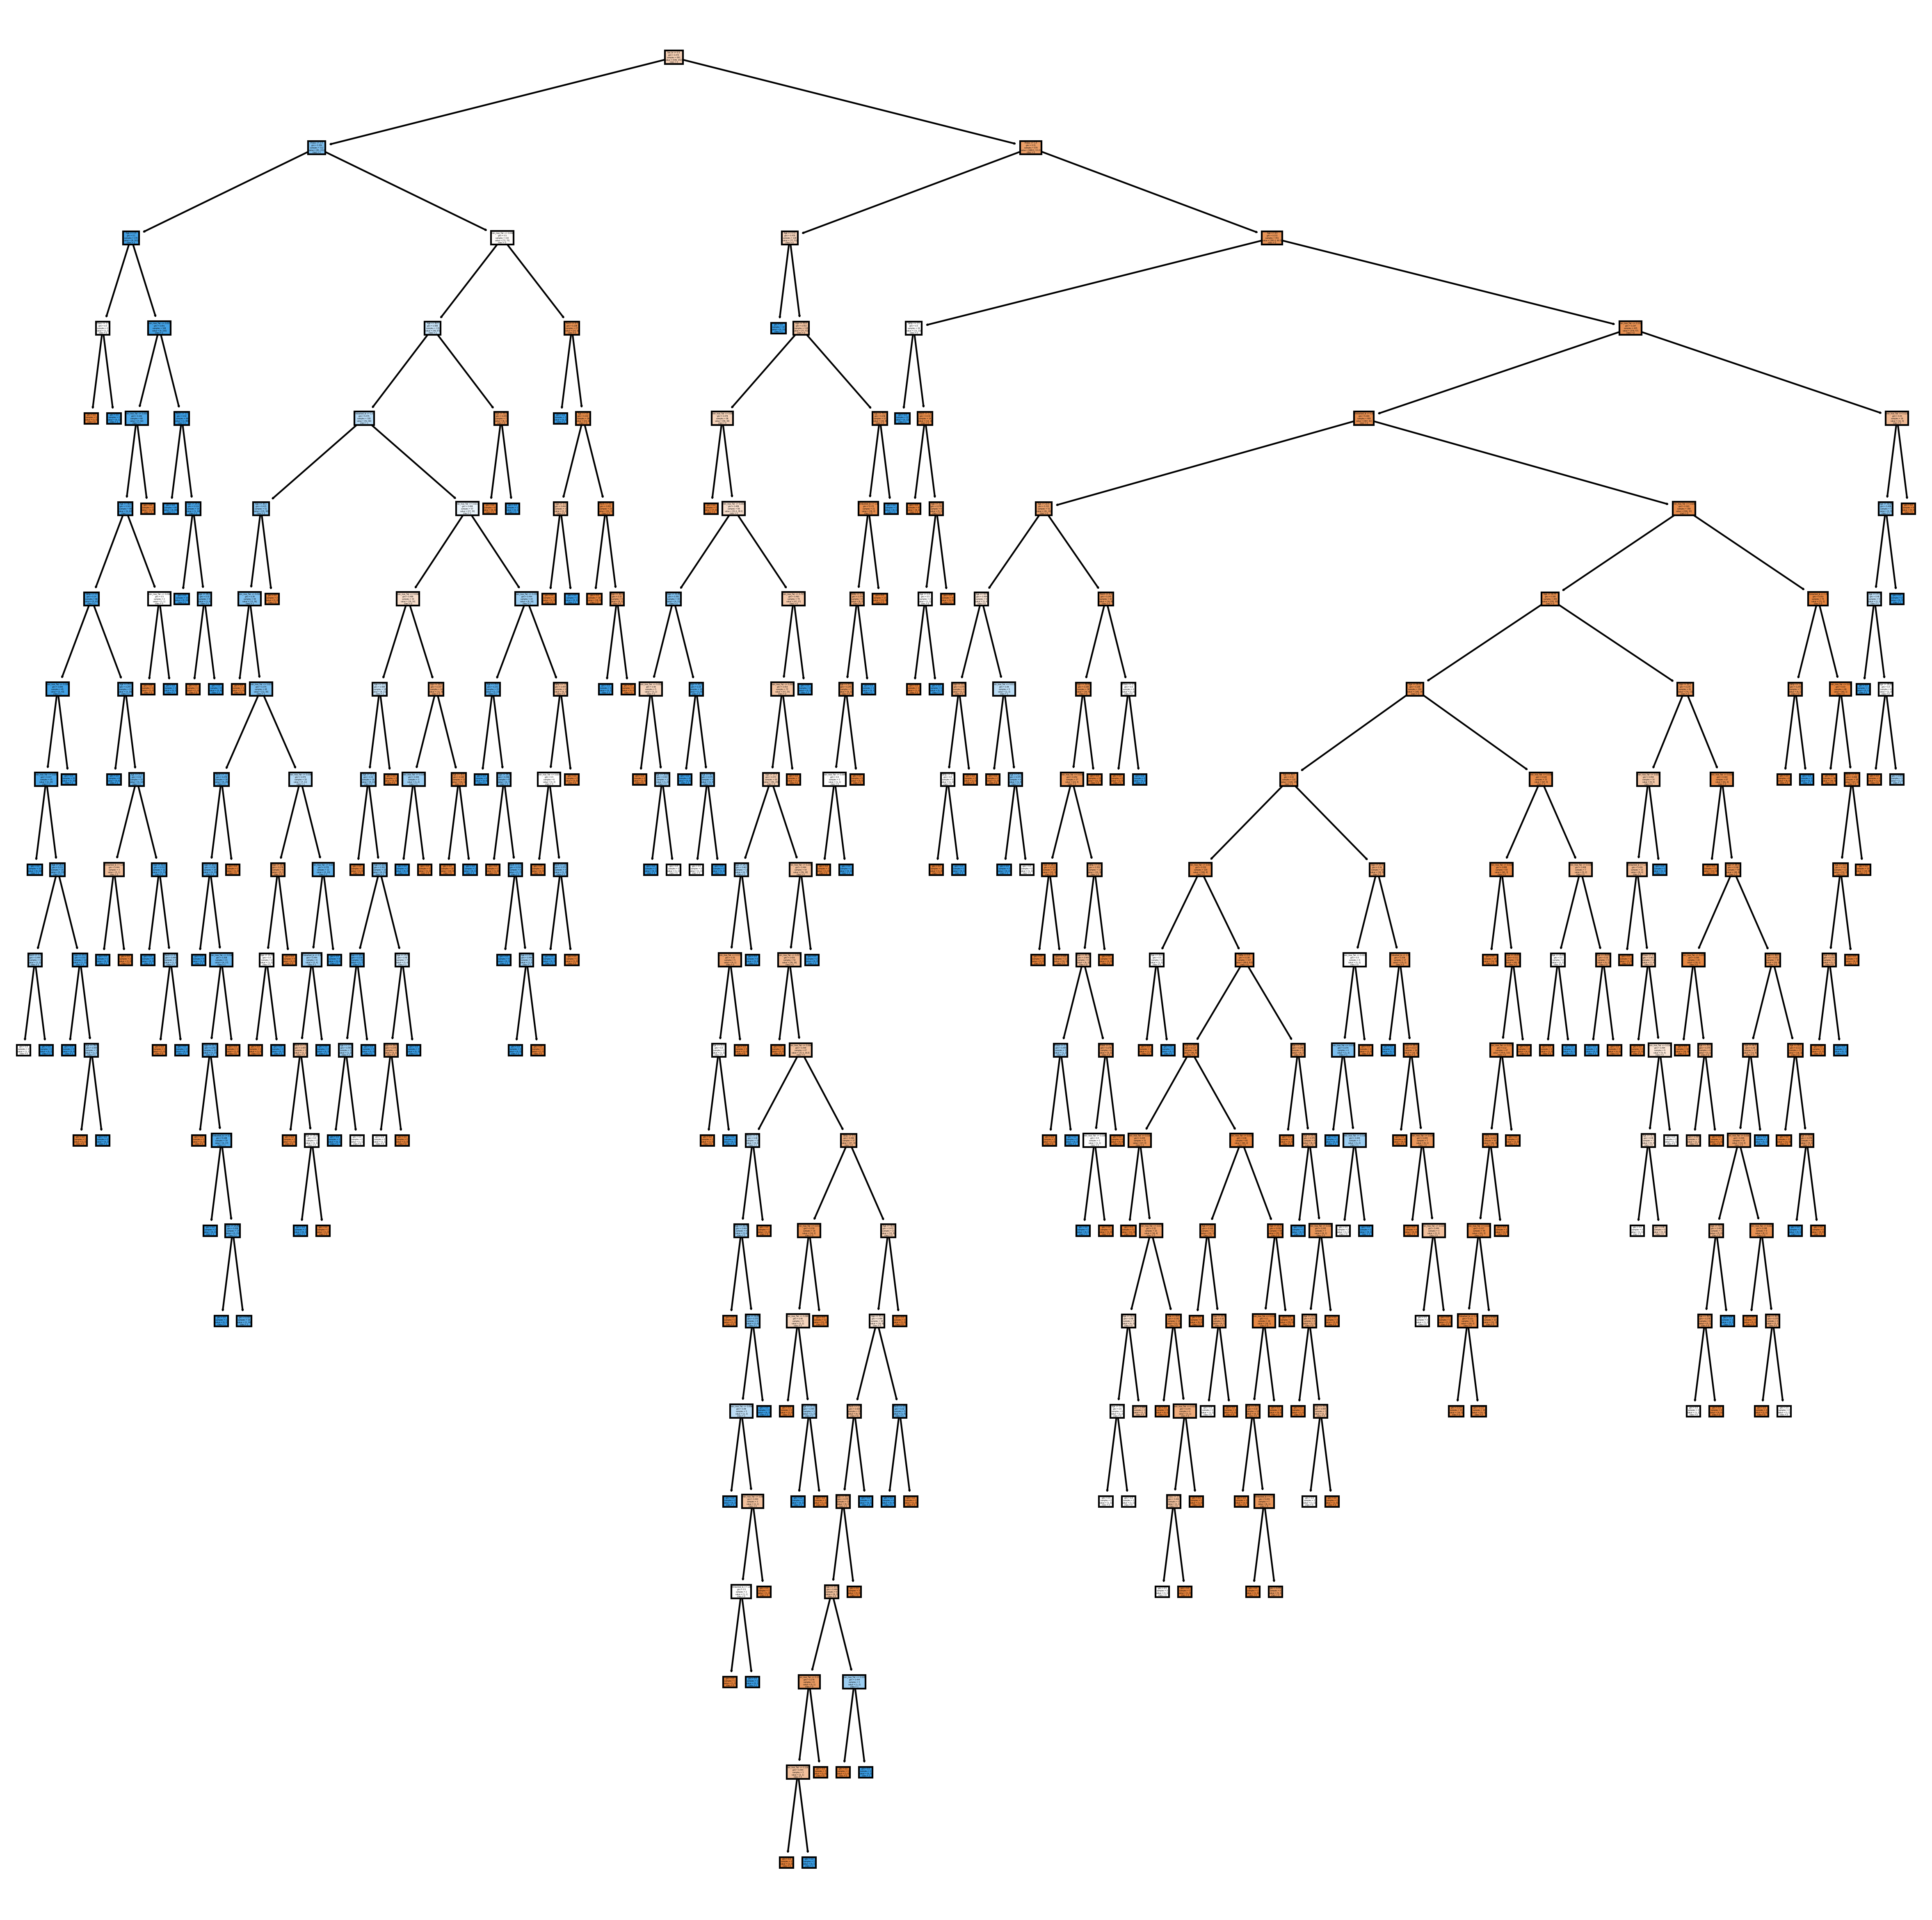

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize =(20,20),dpi=300)
plot_tree(model,filled=True,feature_names=X.columns.tolist(),
         class_names=["0","1"])
plt.show()

In [74]:
#hyper parameter tuning
estimator =DecisionTreeClassifier(random_state=True)
param_grid = {"criterion":["gini","entropy"],
              "max_depth":list(range(1,16))}
dt_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
dt_grid.fit(X,y)
dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=True)

In [75]:
# identifing the import features 
feats_ab = pd.DataFrame(data=dt.feature_importances_,
                       index=X.columns,
                       columns = ["importance"])
important_feature_dt = feats_ab[feats_ab["importance"]>0].index.tolist()
important_feature_dt

['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_le', 'min_max_Fair']

In [76]:
# selection  of the train and the test data
X_dt = X[important_feature_dt]

# modelling
dt =dt_grid.best_estimator_
dt.fit(X_dt,y)
# evaluation
ypred_train = dt.predict(X_dt)

print("train accuracy:",accuracy_score(y,ypred_train))
print("CVscore:",cross_val_score(dt,X_dt,y,cv=5,scoring = "accuracy").mean())


train accuracy: 0.8417508417508418
CVscore: 0.807005209967987


In [77]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y,ypred_train))



confusion_matrix: [[500  49]
 [ 92 250]]


# Random Forest Classifiers

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
# hyper parameter tuning 
estimator = RandomForestClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,51))}
rf_grid  =GridSearchCV(estimator,param_grid,scoring ="accuracy",cv=5)
rf_grid.fit(X,y)
rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=26, random_state=True)

In [80]:
# import features selection in the data set
feats_ab = pd.DataFrame(data=rf.feature_importances_,
                       index=X.columns,
                       columns= ["importance"])
important_features_rf = feats_ab[feats_ab["importance"]>0].index.tolist()
important_features_rf


['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_le', 'Embarked_le', 'min_max_Fair']

In [81]:
X_train_rf = X[important_features_rf]

 # modelling
rf = rf_grid.best_estimator_
rf.fit(X_train_rf,y)

# evaluation
ypred_train =rf.predict(X_train_rf) 


print("train_accuracy:",accuracy_score(y,ypred_train))
print("CVscore:",cross_val_score(rf,X_train_rf,y,cv=5,scoring="accuracy").mean())


train_accuracy: 0.9640852974186308
CVscore: 0.812591802146758


In [82]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y,ypred_train))


confusion_matrix: [[540   9]
 [ 23 319]]


# adhapative boosting 

In [83]:
from sklearn.ensemble import AdaBoostClassifier
estimator = AdaBoostClassifier(random_state=True)
param_grid = {"n_estimators":list(range(1,51))}

ab_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
ab_grid.fit(X,y)
ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=30, random_state=True)

In [84]:
# import feartures selection in the data set
feats_ab = pd.DataFrame(data = ab.feature_importances_,
                       index = X.columns,
                       columns = ["importance"])
important_features_ab = feats_ab[feats_ab["importance"]>0].index.tolist()
important_features_ab

['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_le', 'Embarked_le', 'min_max_Fair']

In [85]:
X_train_ab = X[important_features_ab]


# modelling
ab = ab_grid.best_estimator_
ab.fit(X_train_ab,y)
# evaluation
ypred_train = ab.predict(X_train_ab)


print("train_accuracy:",accuracy_score(y,ypred_train))
print("cvscore:",cross_val_score(ab,X_train_ab,y,cv=5,scoring="accuracy").mean())


train_accuracy: 0.8237934904601572
cvscore: 0.8171175695185487


In [86]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y,ypred_train))


confusion_matrix: [[472  77]
 [ 80 262]]


# Gradient boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
estimator = GradientBoostingClassifier()
param_grid = {"n_estimators":list(range(1,10)),
               "learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
gb_grid = GridSearchCV(estimator,param_grid,scoring = "accuracy",cv= 5)
gb_grid.fit(X,y)
gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.9, n_estimators=5)

In [88]:
# import feature selection
feats_gb = pd.DataFrame(data=gb.feature_importances_,
                       index =X.columns,
                       columns=["importance"])
import_features_gb = feats_gb[feats_gb["importance"]>0].index.tolist()
import_features_gb

['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_le', 'Embarked_le', 'min_max_Fair']

In [89]:
X_train_gb = X[import_features_gb]


gb = gb_grid.best_estimator_
gb.fit(X_train_gb,y)

ypred_train = gb.predict(X_train_gb)


print("trainaccuracy:",accuracy_score(y,ypred_train))
print("cv score:",cross_val_score(gb,X_train_gb,y,cv =5,scoring ="accuracy").mean())

trainaccuracy: 0.8552188552188552
cv score: 0.8226853304877283


In [90]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y,ypred_train))


confusion_matrix: [[504  45]
 [ 84 258]]


# xgboost 

In [91]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
# hyper parameter tuning
estimator = XGBClassifier()
param_grid = {"n_estimators":[10,20,40,100],
              "max_depth":[3,4,5],
              "gamma":[0,0.15,0.3,0.5,1]}
xgb_grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)
xgb_grid.fit(X,y)

xgb = xgb_grid.best_estimator_
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=40, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
# important features selection
feats_xgb  = pd.DataFrame(data=xgb.feature_importances_,
                         index=X.columns,
                         columns=["importance"])
importance_features_xgb = feats_xgb[feats_xgb["importance"]>0].index.tolist()
importance_features_xgb

['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_le', 'Embarked_le', 'min_max_Fair']

In [94]:
X_train_xgb = X[importance_features_xgb]

# modellling 
xbg = xgb_grid.best_estimator_
xgb.fit(X,y)

# evaluation
ypred_train = xgb.predict(X_train_xgb)

print("trainaccuracy:",accuracy_score(y,ypred_train))
print("cv score:",cross_val_score(xgb,X_train_xgb,y,cv = 5,scoring="accuracy").mean())


trainaccuracy: 0.9057239057239057
cv score: 0.8283221392254095


In [95]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix:",confusion_matrix(y,ypred_train))


confusion_matrix: [[523  26]
 [ 58 284]]


In [96]:
from joblib import dump
dump(knn_model,"TITAN REAL ONE SWITH OUTPCA.joblib")

['TITAN REAL ONE SWITH OUTPCA.joblib']